<a href="https://colab.research.google.com/github/kaneeshajain-001/Finance-Projects/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [ ]:
import quandl
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

<Figure size 1000x500 with 0 Axes>

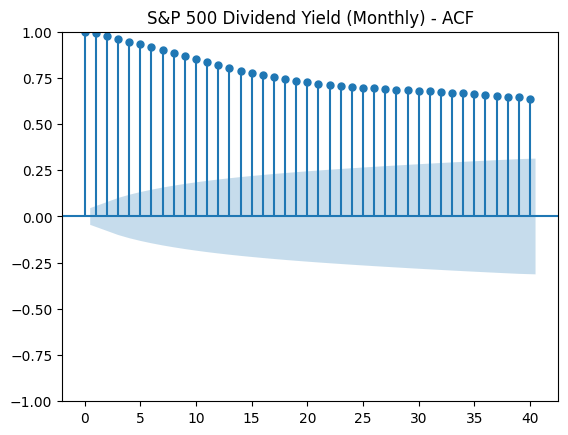

<Figure size 1000x500 with 0 Axes>

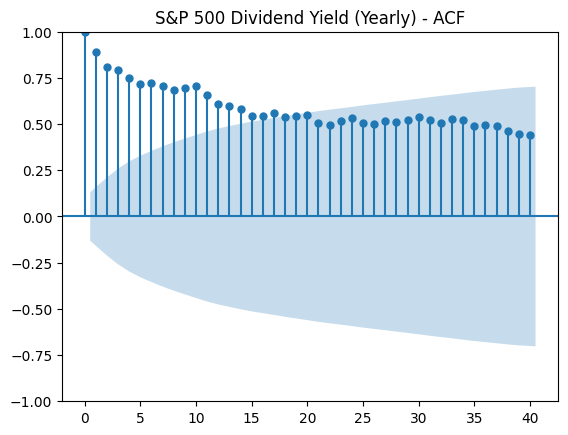

<Figure size 1000x500 with 0 Axes>

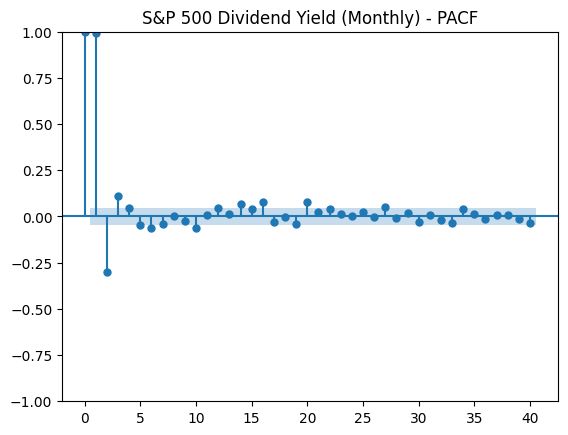

<Figure size 1000x500 with 0 Axes>

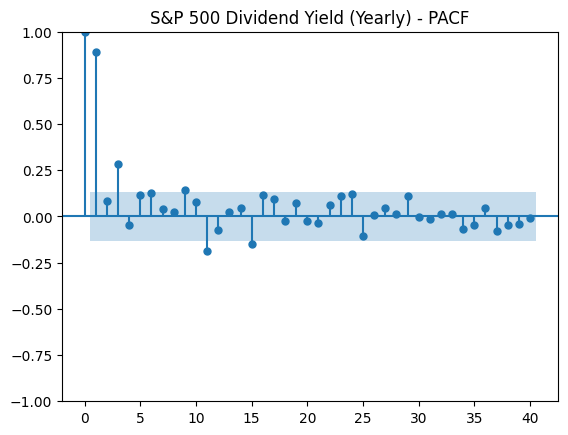

In [ ]:
quandl.ApiConfig.api_key = 'QnD9rNXFwSXk3fw3z7By'
monthly_data = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH')
monthly_data.to_csv('monthly_data.csv')

yearly_data = quandl.get('MULTPL/SP500_DIV_YIELD_YEAR')
yearly_data.to_csv('yearly_data.csv')

monthly_series = monthly_data['Value']
yearly_series = yearly_data['Value']

plt.figure(figsize=(10, 5))
plot_acf(monthly_series, lags=40)
plt.title('S&P 500 Dividend Yield (Monthly) - ACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_acf(yearly_series, lags=40)
plt.title('S&P 500 Dividend Yield (Yearly) - ACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(monthly_series, lags=40)
plt.title('S&P 500 Dividend Yield (Monthly) - PACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(yearly_series, lags=40)
plt.title('S&P 500 Dividend Yield (Yearly) - PACF')
plt.show()


EXPLANATION:
1. ACF of Monthly Dividend Yield : Lag=0 represents correlation of series with itself which is 1. As we go furthur, the ACF decreases which represents the decreasing dependence of X(t+k) on X(t) as k increases. However even at lag=40, the value of ACF is ~ 0.65. This means that series is quite persistent/past values have a long-lasting influence on future values.


2. ACF of Yearly Dividend Yield : Lag=0 represents correlation of series with itself which is 1. As we go furthur, the ACF decreases which represents the decreasing dependence of X(t+k) on X(t) as k increases. However, unlike monthly yield, this decrease is not uniform. This can be due to existance of some patterns/cycles/seasonal effects which lead to spike of ACF. At lag=40, the value of ACF is ~0.4. This means that series is still quite persistent.


3. PACF of Monthly Dividend Yield : PACF denotes the influence of the data on t-k directly on t(where k is the lag). At lag=0, PACF=1. At lag=1, PACF=1 denoting the strong correlation of data between 2 consecutive months. However for lag=2, PACF is negative hinting negative correlation. Furthur down the line, PACF~0 denoting the lack of correlation/weak correlation.

4. PACF of Yearly Dividend Yield : PACF for yearly data depicts values still ~ (-0.25 to 0.25). These are slightly higher that monthly PACF data, depiction the comparitively stronger correlation. This can be due to existing seasonal patterns.

<Figure size 1000x500 with 0 Axes>

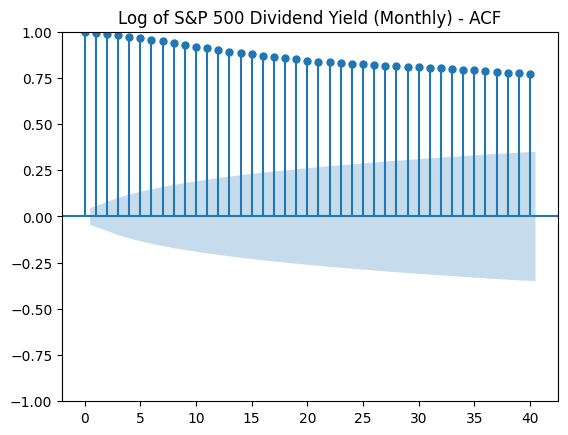

<Figure size 1000x500 with 0 Axes>

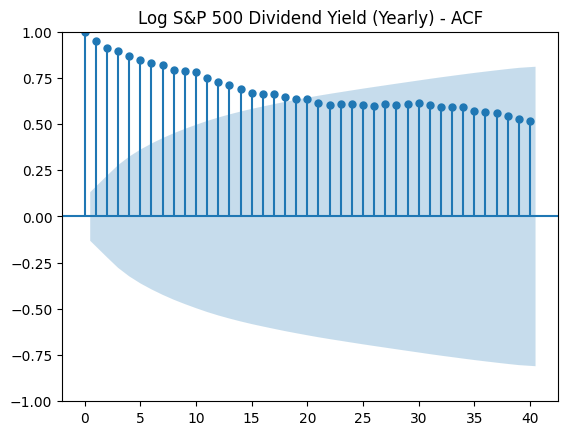

<Figure size 1000x500 with 0 Axes>

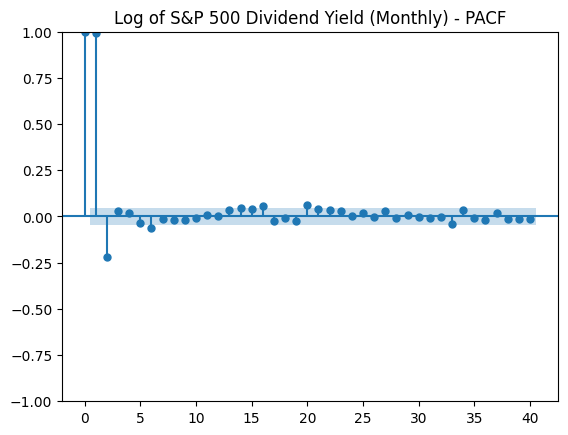

<Figure size 1000x500 with 0 Axes>

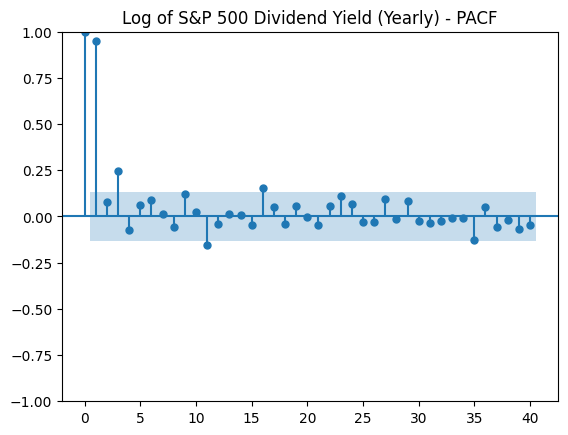

In [ ]:
log_monthly_series = np.log(monthly_series)
log_yearly_series = np.log(yearly_series)

plt.figure(figsize=(10, 5))
plot_acf(log_monthly_series, lags=40)
plt.title('Log of S&P 500 Dividend Yield (Monthly) - ACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_acf(log_yearly_series, lags=40)
plt.title('Log S&P 500 Dividend Yield (Yearly) - ACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(log_monthly_series, lags=40)
plt.title('Log of S&P 500 Dividend Yield (Monthly) - PACF')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(log_yearly_series, lags=40)
plt.title('Log of S&P 500 Dividend Yield (Yearly) - PACF')
plt.show()

EXPLANATION:


Log curve represents a more stabilized data especially in cases of non linear ACF curves. This can be seen from the difference in yearly series ACF plots. Trends that were non-linear in the original series might become more linear in the log-transformed series, affecting the PACF.

In [ ]:
# Box-Ljung Test
print("Monthly series: ")
monthly_ljung = diag.acorr_ljungbox(monthly_series, lags=[5])
print(monthly_ljung)

print("\nYearly series: ")
yearly_ljung = diag.acorr_ljungbox(yearly_series, lags=[5])
print(yearly_ljung)

print("\nLog Monthly series: ")
log_monthly_ljung = diag.acorr_ljungbox(log_monthly_series, lags=[5])
print(log_monthly_ljung)

print("\nLog Yearly series: ")
log_yearly_ljung = diag.acorr_ljungbox(log_yearly_series, lags=[5])
print(log_yearly_ljung)

Monthly series: 
       lb_stat  lb_pvalue
5  8662.302222        0.0

Yearly series: 
      lb_stat      lb_pvalue
5  712.627209  9.139177e-152

Log Monthly series: 
       lb_stat  lb_pvalue
5  9001.468957        0.0

Log Yearly series: 
    lb_stat      lb_pvalue
5  906.8079  8.947345e-194


EXPLANATION:


Test Statistic (lb_stat):
This value measures the cumulative autocorrelation up to the specified lag. Higher values indicate stronger evidence of autocorrelation.


P-Value (lb_pvalue):
The p-value tells whether the observed cumulative autocorrelation is statistically significant. A low p-value (typically < 0.05) indicates that the autocorrelation is significant that cannot be attributed to chance.

In [ ]:
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("\n")

print("Monthly series")
adf_test(monthly_series)

print("Yearly series")
adf_test(yearly_series)

print("Log monthly series")
adf_test(log_monthly_series)

print("Log yearly series")
adf_test(log_yearly_series)

Monthly series
Test Statistic: -2.671926282110378
p-value: 0.07902350263547014


Yearly series
Test Statistic: -1.2279573409596072
p-value: 0.6614550528336376


Log monthly series
Test Statistic: -1.60030391716228
p-value: 0.48344079967575926


Log yearly series
Test Statistic: -1.5417557789158303
p-value: 0.5127636077673934




EXPLANATION:


In ADF test, if Test statistic < p-value < 0.05 the null hypothesis is rejected, i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure. Test Statistic < p-value in all cases. However, in our case, monthly_series(p value = 0.07) is a borderline case but still implies non-stationarity. In all other cases p values are significantly > 0.05 hence implying that these time series likely contain trends or other non-stationary behavior.  